<a href="https://colab.research.google.com/github/D3sert650/SEM_Assignment_1/blob/main/SEM_Sprint_1_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install cellxgene-census
!pip install scanpy
!pip install pandas_profiling
!pip install pydantic-settings
!pip install ydata-profiling
!pip install jupyter-contrib-nbextensions
!pip install scikit-learn
!pip install igraph
!pip install scvi-tools
!pip install scikit-misc
!pip install leidenalg
#!pip install PyWGCNA numpy==1.23.5 pandas scipy matplotlib seaborn scikit-learn

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 82.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 67.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 6.7 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=

In [2]:
import cellxgene_census
import scanpy as sc
import tiledbsoma
from ydata_profiling import ProfileReport
import sys
import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [3]:
# Download and load Dataset
try:
  cellxgene_census.download_source_h5ad("9813a1d4-d107-459e-9b2e-7687be935f69", to_path="inhibitory.h5ad")
except:
  print("Already downloaded")
adata = sc.read_h5ad("inhibitory.h5ad")

# Load genes
urllib.request.urlretrieve("https://raw.githubusercontent.com/D3sert650/SEM_Assignment_1/refs/heads/main/data/differential_expression_AD_Normal.csv","differential_expression_AD_Normal.csv")
genes = pd.read_csv("differential_expression_AD_Normal.csv",comment="#")
genes.head()

Downloading: 100%|██████████| 229M/229M [00:18<00:00, 12.8MB/s]


Gene  Log Fold Change  Effect Size  Adjusted P-Value
0        SLC26A3            1.246        3.958               0.0
1       RASGEF1B            2.178        3.855               0.0
2  RP11-701H24.9            1.044        3.396               0.0
3         LINGO1            1.797        2.873               0.0
4        PDE4DIP            1.276        2.671               0.0

In [4]:
# Preprocessing and Quality Control
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [5]:
# Perform clustering
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)

<ipython-input-5-ce5cc370108e>:5: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata)


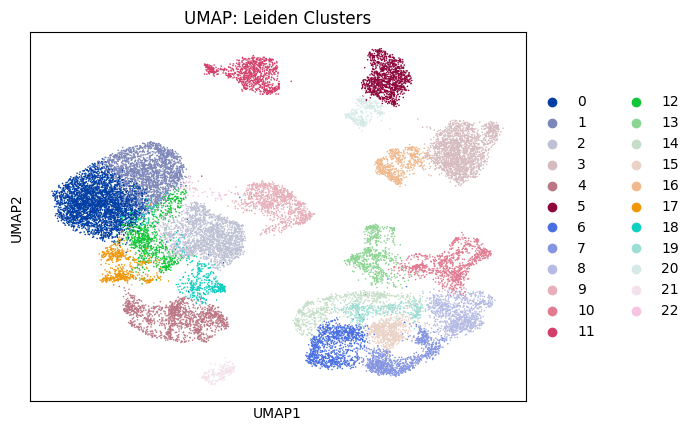

In [6]:
# Visualize clusters
sc.pl.umap(adata, color='leiden', title='UMAP: Leiden Clusters')
plt.show()

In [7]:
# Map genes to name
gene_alias = dict(map(lambda i,j : (i,j), adata.var.index, adata.var['feature_name']))
gene_aliases = dict((v, k) for k, v in gene_alias.items())
gene_aliases

{'C6orf136': 'ENSG00000204564',
 'GADD45A': 'ENSG00000116717',
 'SPON1-AS1': 'ENSG00000254418',
 'EFCC1': 'ENSG00000114654',
 'ENSG00000257894.2': 'ENSG00000257894',
 'TMEM207': 'ENSG00000198398',
 'CD82': 'ENSG00000085117',
 'G2E3': 'ENSG00000092140',
 'ITPA': 'ENSG00000125877',
 'MGMT': 'ENSG00000170430',
 'ENSG00000231662.1': 'ENSG00000231662',
 'NLRC5': 'ENSG00000140853',
 'DBX2': 'ENSG00000185610',
 'WIPF2': 'ENSG00000171475',
 'KCTD4': 'ENSG00000180332',
 'KDR': 'ENSG00000128052',
 'ENSG00000270000.1': 'ENSG00000270000',
 'CENPJ': 'ENSG00000151849',
 'MGAM': 'ENSG00000257335',
 'ENSG00000251665.1': 'ENSG00000251665',
 'ZBTB26': 'ENSG00000171448',
 'WDR41': 'ENSG00000164253',
 'LINC02795': 'ENSG00000285210',
 'TRHDE': 'ENSG00000072657',
 'RAB11FIP4': 'ENSG00000131242',
 'MNX1': 'ENSG00000130675',
 'LINC01410': 'ENSG00000238113',
 'RLBP1': 'ENSG00000140522',
 'ZNF429': 'ENSG00000197013',
 'ENSG00000249776.5': 'ENSG00000249776',
 'GYPB': 'ENSG00000250361',
 'OLFML2B': 'ENSG000001627

In [16]:
# tangle_markers = [
#     'MAPT',    # Microtubule-associated protein tau
#     'APP',     # Amyloid precursor protein
#     'PSEN1',   # Presenilin 1
#     'PSEN2',   # Presenilin 2
#     'APOE',    # Apolipoprotein E
#     'GSK3B',   # Glycogen synthase kinase 3 beta
#     'CDK5',    # Cyclin-dependent kinase 5
#     'MARK1',   # Microtubule affinity regulating kinase 1
#     'MARK2',   # Microtubule affinity regulating kinase 2
#     'MARK3',   # Microtubule affinity regulating kinase 3
#     'MARK4',   # Microtubule affinity regulating kinase 4
#     'MAPK10',  # Mitogen-activated protein kinase 10
#     'CSNK1D',  # Casein kinase 1 delta
#     'CSNK1E',  # Casein kinase 1 epsilon
#     'DYRK1A',  # Dual specificity tyrosine phosphorylation regulated kinase 1A
#     'BACE1',   # Beta-secretase 1
#     'NCSTN',   # Nicastrin
#     'TREM2',   # Triggering receptor expressed on myeloid cells 2
#     'CLU',     # Clusterin
#     'BIN1',    # Bridging integrator 1
#     'PICALM',  # Phosphatidylinositol binding clathrin assembly protein
#     'CD33',    # CD33 molecule
#     'MS4A6A',  # Membrane spanning 4-domains A6A
#     'ABCA7',   # ATP binding cassette subfamily A member 7
#     'CD2AP',   # CD2 associated protein
#     'EPHA1',   # EPH receptor A1
#     'HLA-DRB5',# Major histocompatibility complex, class II, DR beta 5
#     'SORL1',   # Sortilin related receptor 1
#     'PTK2B',   # Protein tyrosine kinase 2 beta
#     'INPP5D',  # Inositol polyphosphate-5-phosphatase D
#     'MEF2C',   # Myocyte enhancer factor 2C
#     'NME8',    # NME/NM23 family member 8
#     'ZCWPW1',  # Zinc finger CW-type and PWWP domain containing 1
#     'CELF1',   # CUGBP Elav-like family member 1
#     'FERMT2',  # Fermitin family member 2
#     'SLC24A4', # Solute carrier family 24 member 4
#     'ADAM10',  # ADAM metallopeptidase domain 10
#     'IGHV1-67',# Immunoglobulin heavy variable 1-67
#     'ACE',     # Angiotensin I converting enzyme
# ]

identified_markers = [
                   'DPP10',
                   'SOX6',
                   'SPARCL1',
                   'MT-ND4',
                   'MT-CO2',
                   'NRG1',
                   'GRIK1',
                   'DLGAP1',
                   'CNTN5',
                   'NLGN4X',
                   'NLGN4Y'
]

# Check if the markers exist in the dataset using the aliases
def flatten_and_stringify(lst):
    flattened = []
    for item in lst:
        if isinstance(item, list):
            flattened.extend(flatten_and_stringify(item))
        else:
            flattened.append(str(item))
    return flattened

existing_markers = flatten_and_stringify([marker for marker in identified_markers if marker in gene_aliases])

print(f"Markers found in the dataset: {existing_markers}")
print(f"Markers not found in the dataset: {set(identified_markers) - set(existing_markers)}")

Markers found in the dataset: ['DPP10', 'SOX6', 'SPARCL1', 'MT-ND4', 'MT-CO2', 'NRG1', 'GRIK1', 'DLGAP1', 'CNTN5', 'NLGN4X', 'NLGN4Y']
Markers not found in the dataset: set()


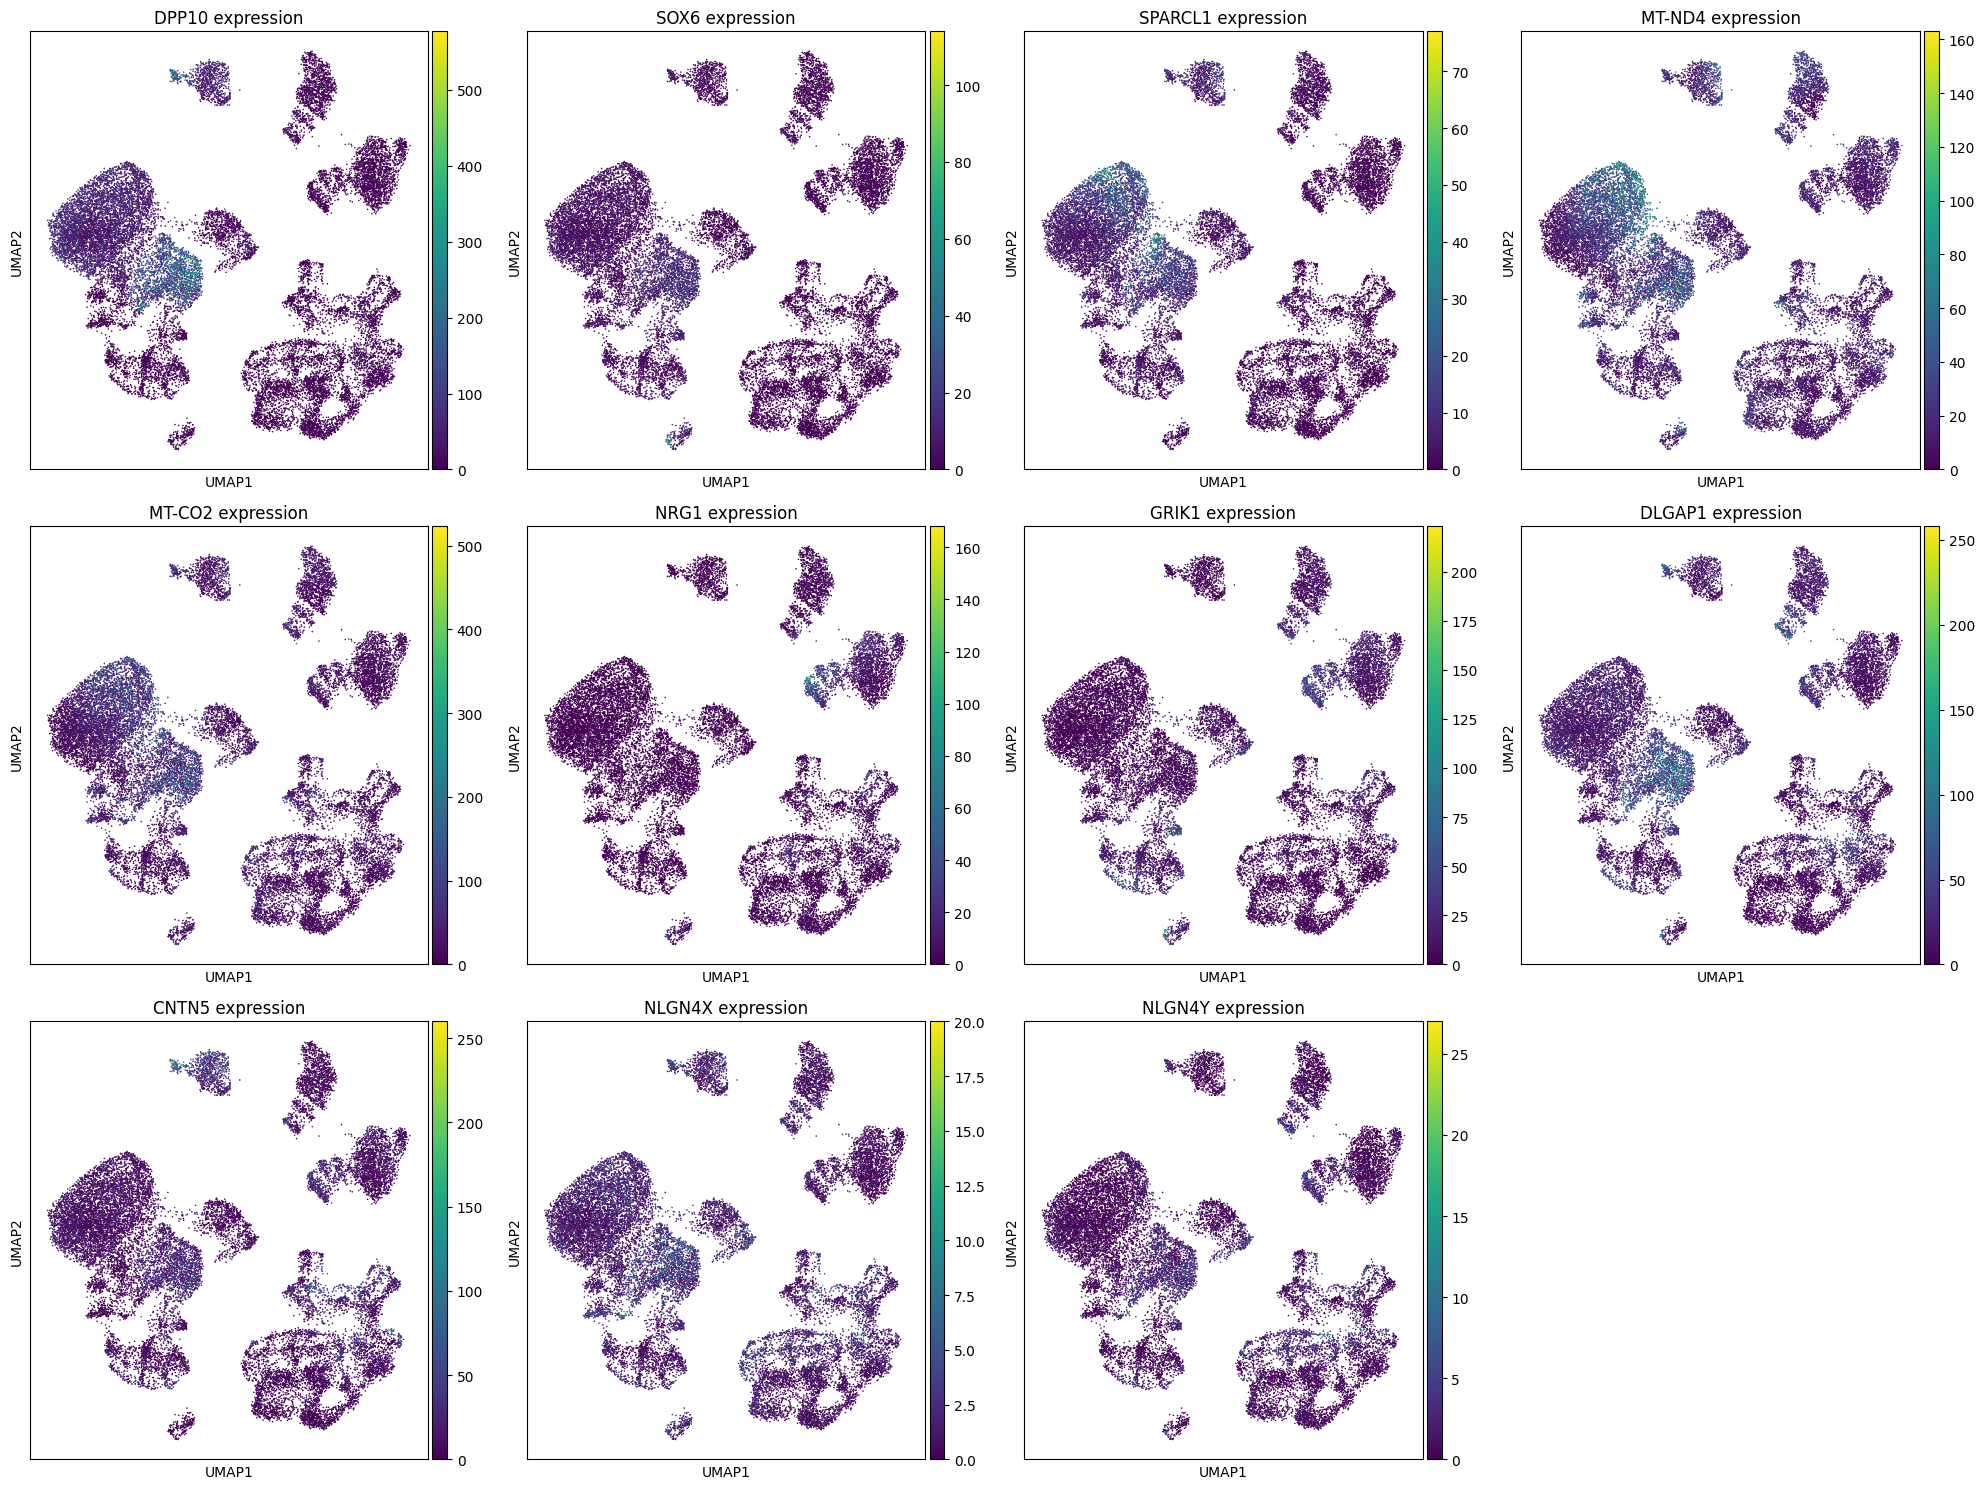

In [17]:
# Visualize expression of existing markers
if existing_markers:
    n_cols = 4
    n_rows = (len(existing_markers) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
    axes = axes.flatten()

    for i, marker in enumerate(existing_markers):
        sc.pl.umap(adata, color=gene_aliases[marker], ax=axes[i], show=False, title=f'{marker} expression')

    for i in range(len(existing_markers), len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:429: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:431: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:434: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result

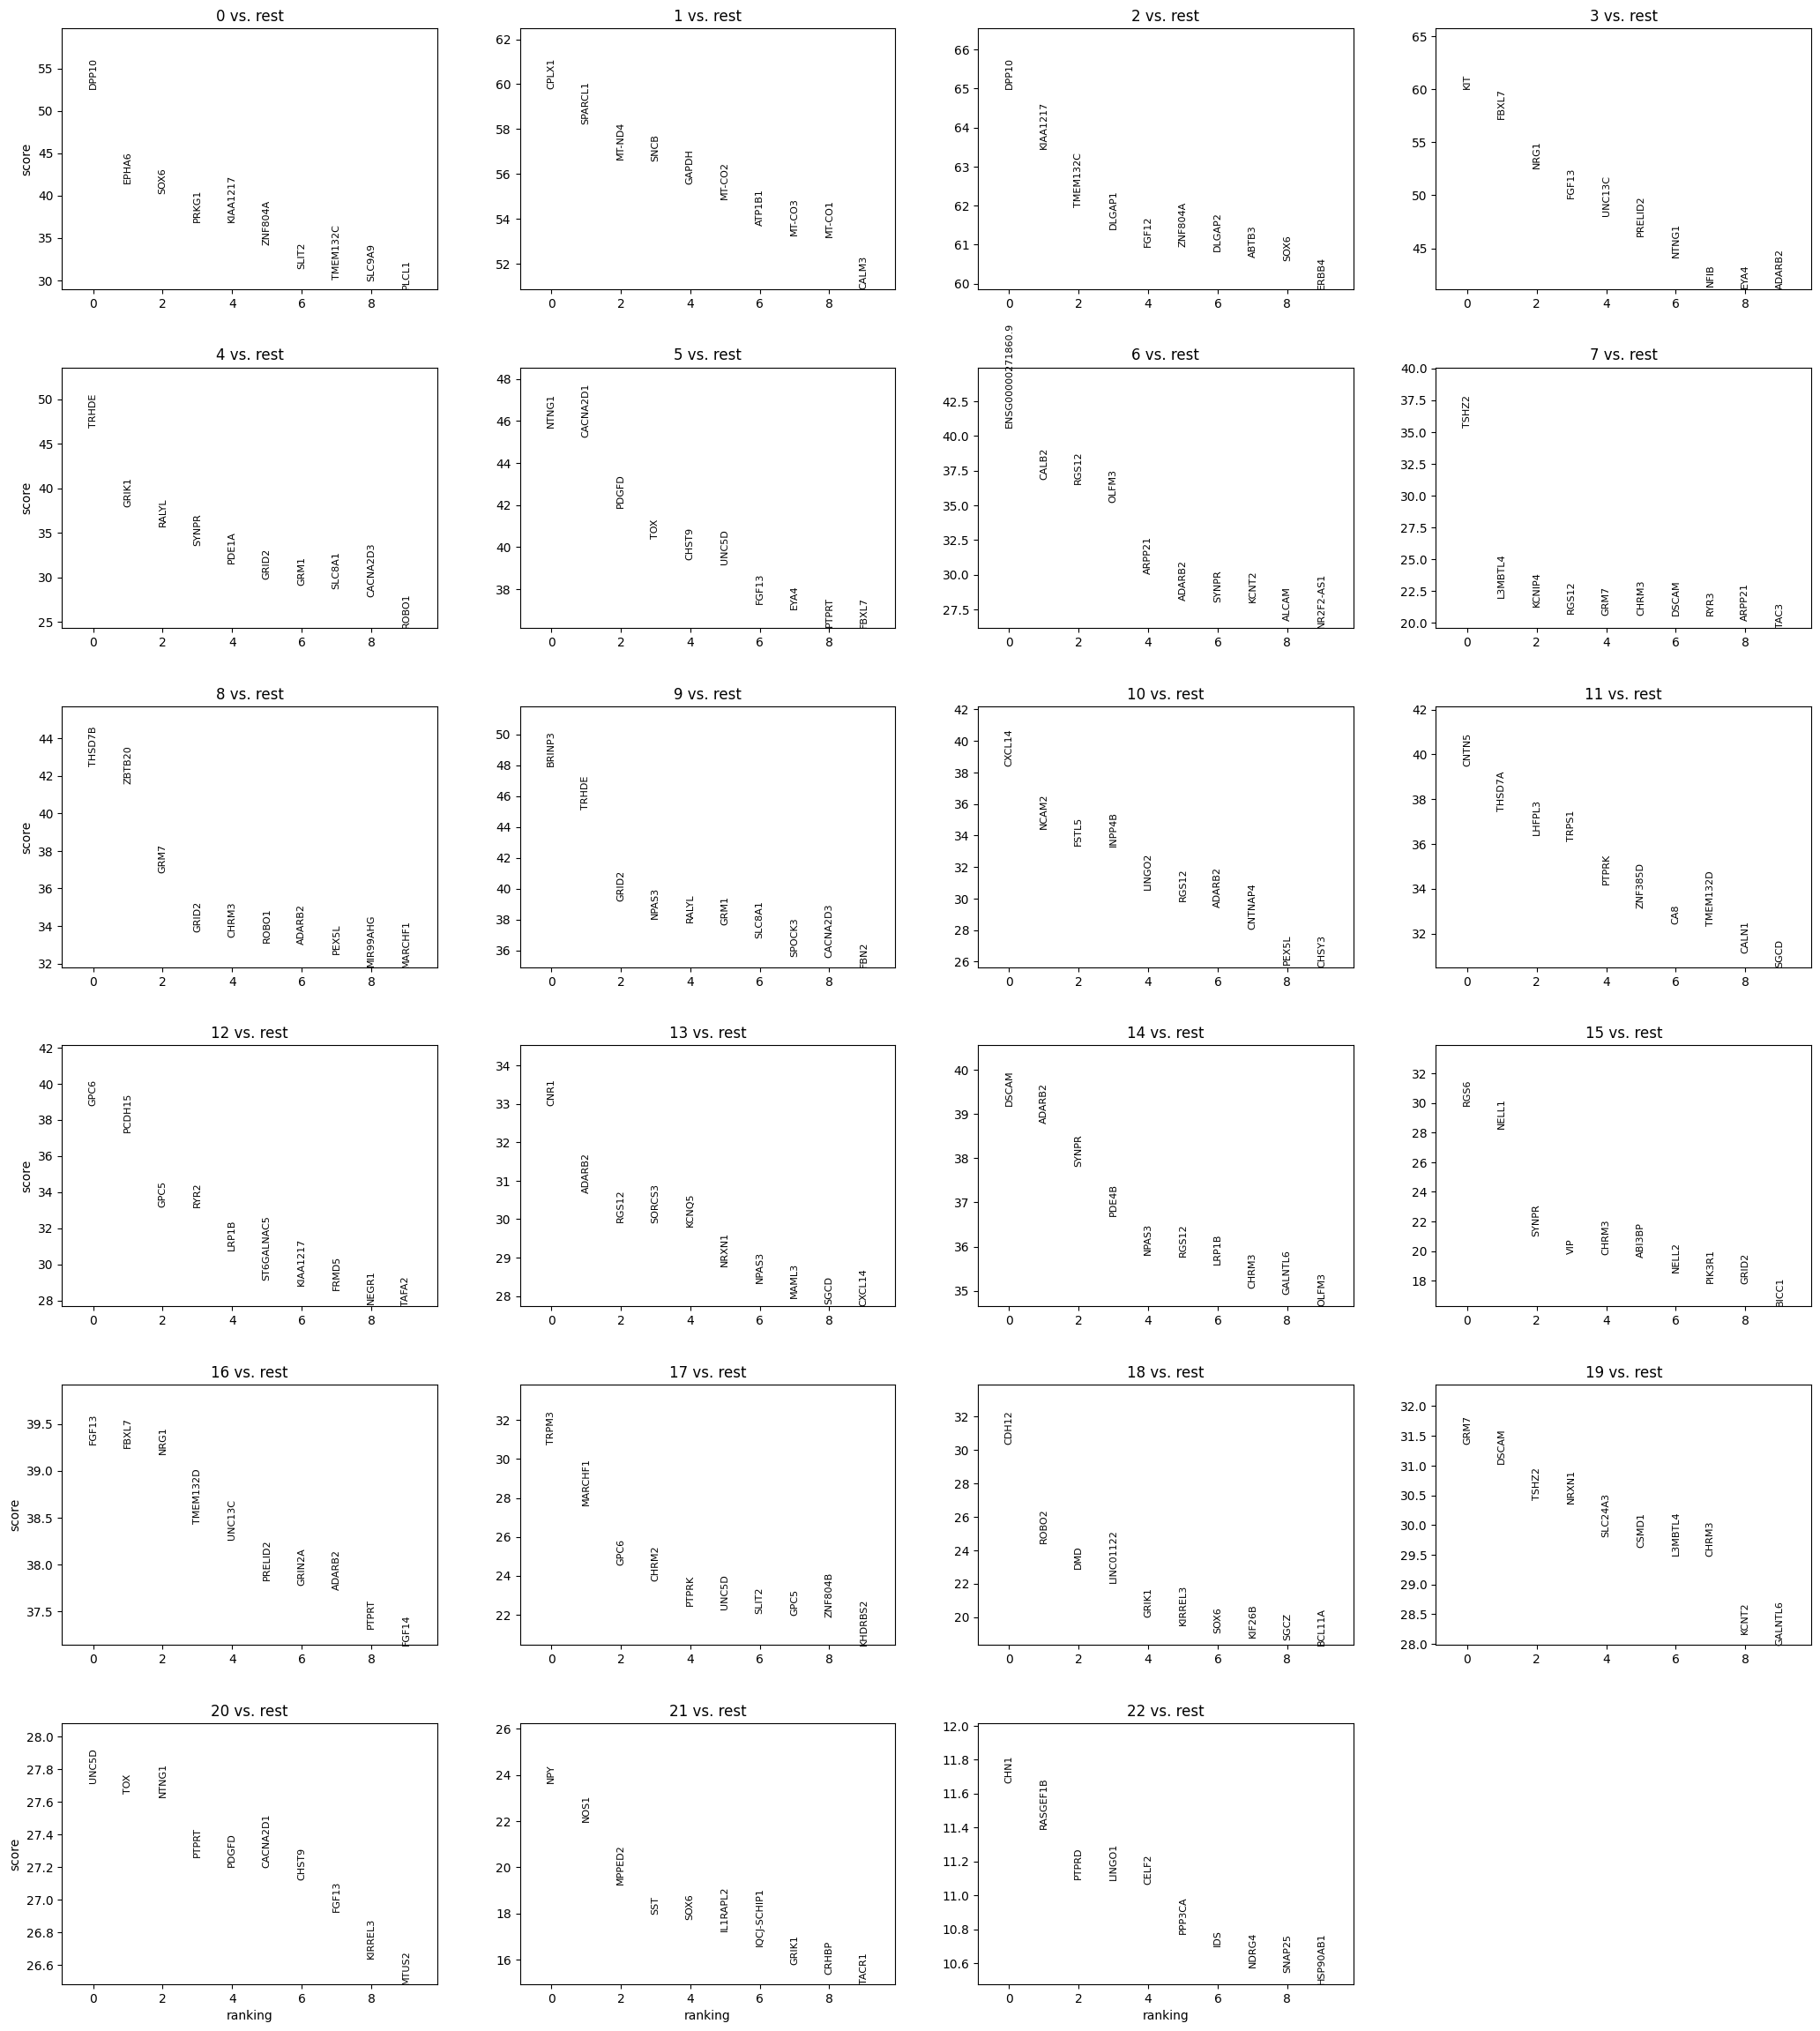

In [10]:
# Perform differential expression analysis for each cluster
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=10, sharey=False,gene_symbols="feature_name")
plt.show()

In [11]:
for group in range(0,23):
  print(f"group: {group} -----------------")
  dedf = sc.get.rank_genes_groups_df(adata, group=str(group))
  dedf.names = dedf.names.map(gene_alias)
  print(dedf.head())

group: 0 -----------------
      names     scores  logfoldchanges          pvals      pvals_adj
0     DPP10  52.626438       23.193899   0.000000e+00   0.000000e+00
1     EPHA6  41.416973        4.062313   0.000000e+00   0.000000e+00
2      SOX6  40.231812        1.887278   0.000000e+00   0.000000e+00
3     PRKG1  36.905365        1.760576  3.790427e-298  5.453436e-295
4  KIAA1217  36.851604        2.032149  2.756555e-297  3.800715e-294
group: 1 -----------------
     names     scores  logfoldchanges  pvals  pvals_adj
0    CPLX1  59.808949        6.787145    0.0        0.0
1  SPARCL1  58.209942       14.732628    0.0        0.0
2   MT-ND4  56.657883       36.507767    0.0        0.0
3     SNCB  56.559666        5.054237    0.0        0.0
4    GAPDH  55.557262        7.172352    0.0        0.0
group: 2 -----------------
      names     scores  logfoldchanges  pvals  pvals_adj
0     DPP10  64.998993      147.078995    0.0        0.0
1  KIAA1217  63.455952       26.867765    0.0        0.

Proceeding with analysis using 11 found markers.


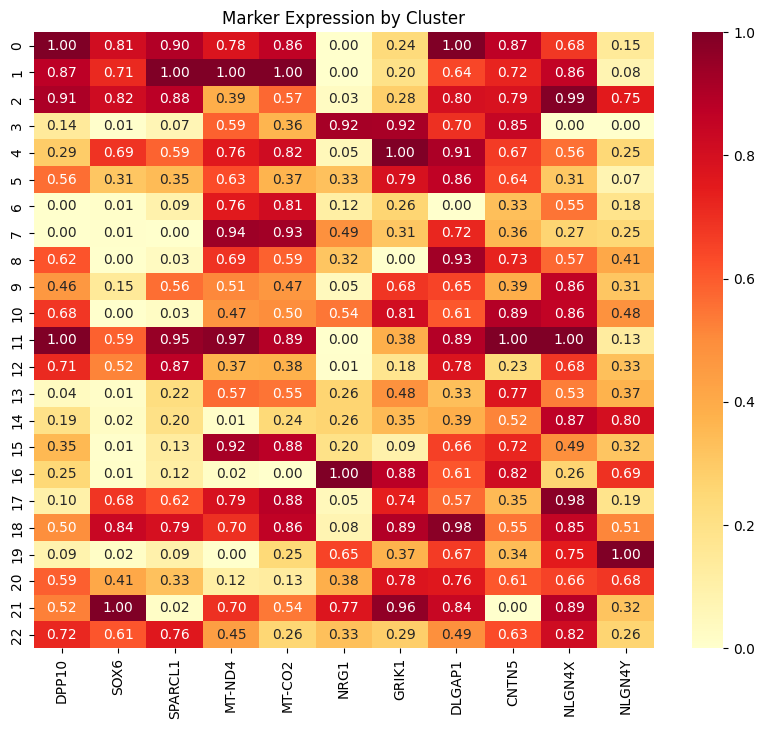

Potential clusters of interest: ['0', '1', '3', '6', '8', '12', '13', '16']


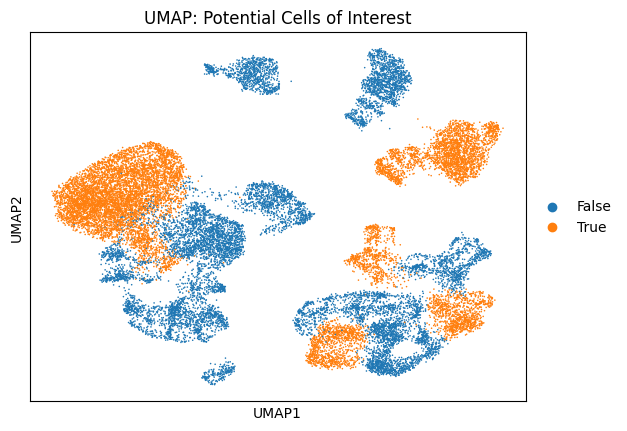

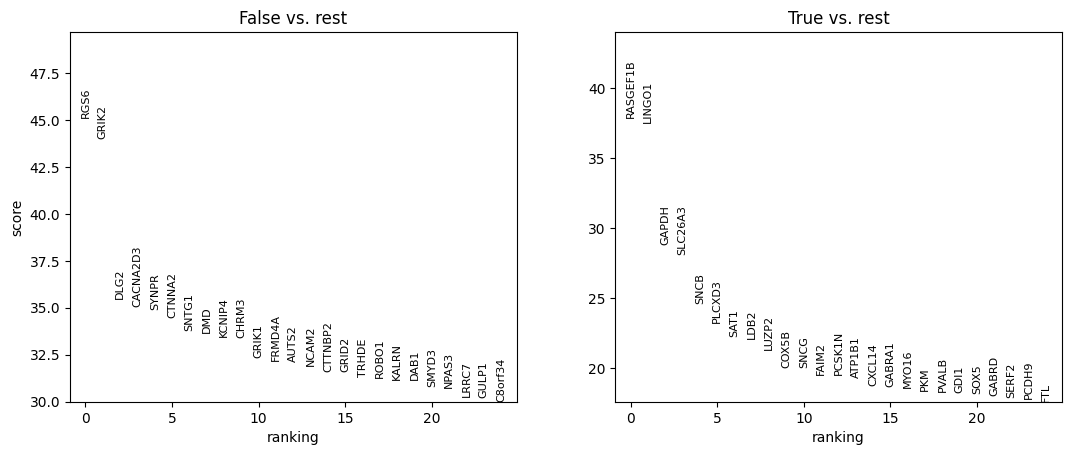

Top 50 genes enriched in potential cells of interest:
          names  logfoldchanges      pvals_adj
0      RASGEF1B        1.840746   0.000000e+00
1        LINGO1        1.822733  7.688392e-304
2         GAPDH        1.977390  3.538372e-179
3       SLC26A3        1.112762  4.841117e-171
4          SNCB        1.425074  6.496372e-131
5        PLCXD3        0.704901  9.686683e-117
6          SAT1        1.148247  2.553819e-107
7          LDB2        0.402124  8.292728e-106
8         LUZP2        1.347576   1.119818e-98
9         COX5B        1.563791   1.026882e-86
10         SNCG        2.026873   1.093097e-86
11        FAIM2        1.129316   8.079229e-83
12       PCSK1N        0.970391   1.514697e-82
13       ATP1B1        2.689126   8.450636e-81
14       CXCL14        1.512888   3.223667e-76
15       GABRA1        0.738082   1.626039e-75
16        MYO16        0.018127   1.007330e-74
17          PKM        1.128930   2.202769e-73
18        PVALB        2.535082   1.720405e-72
19    

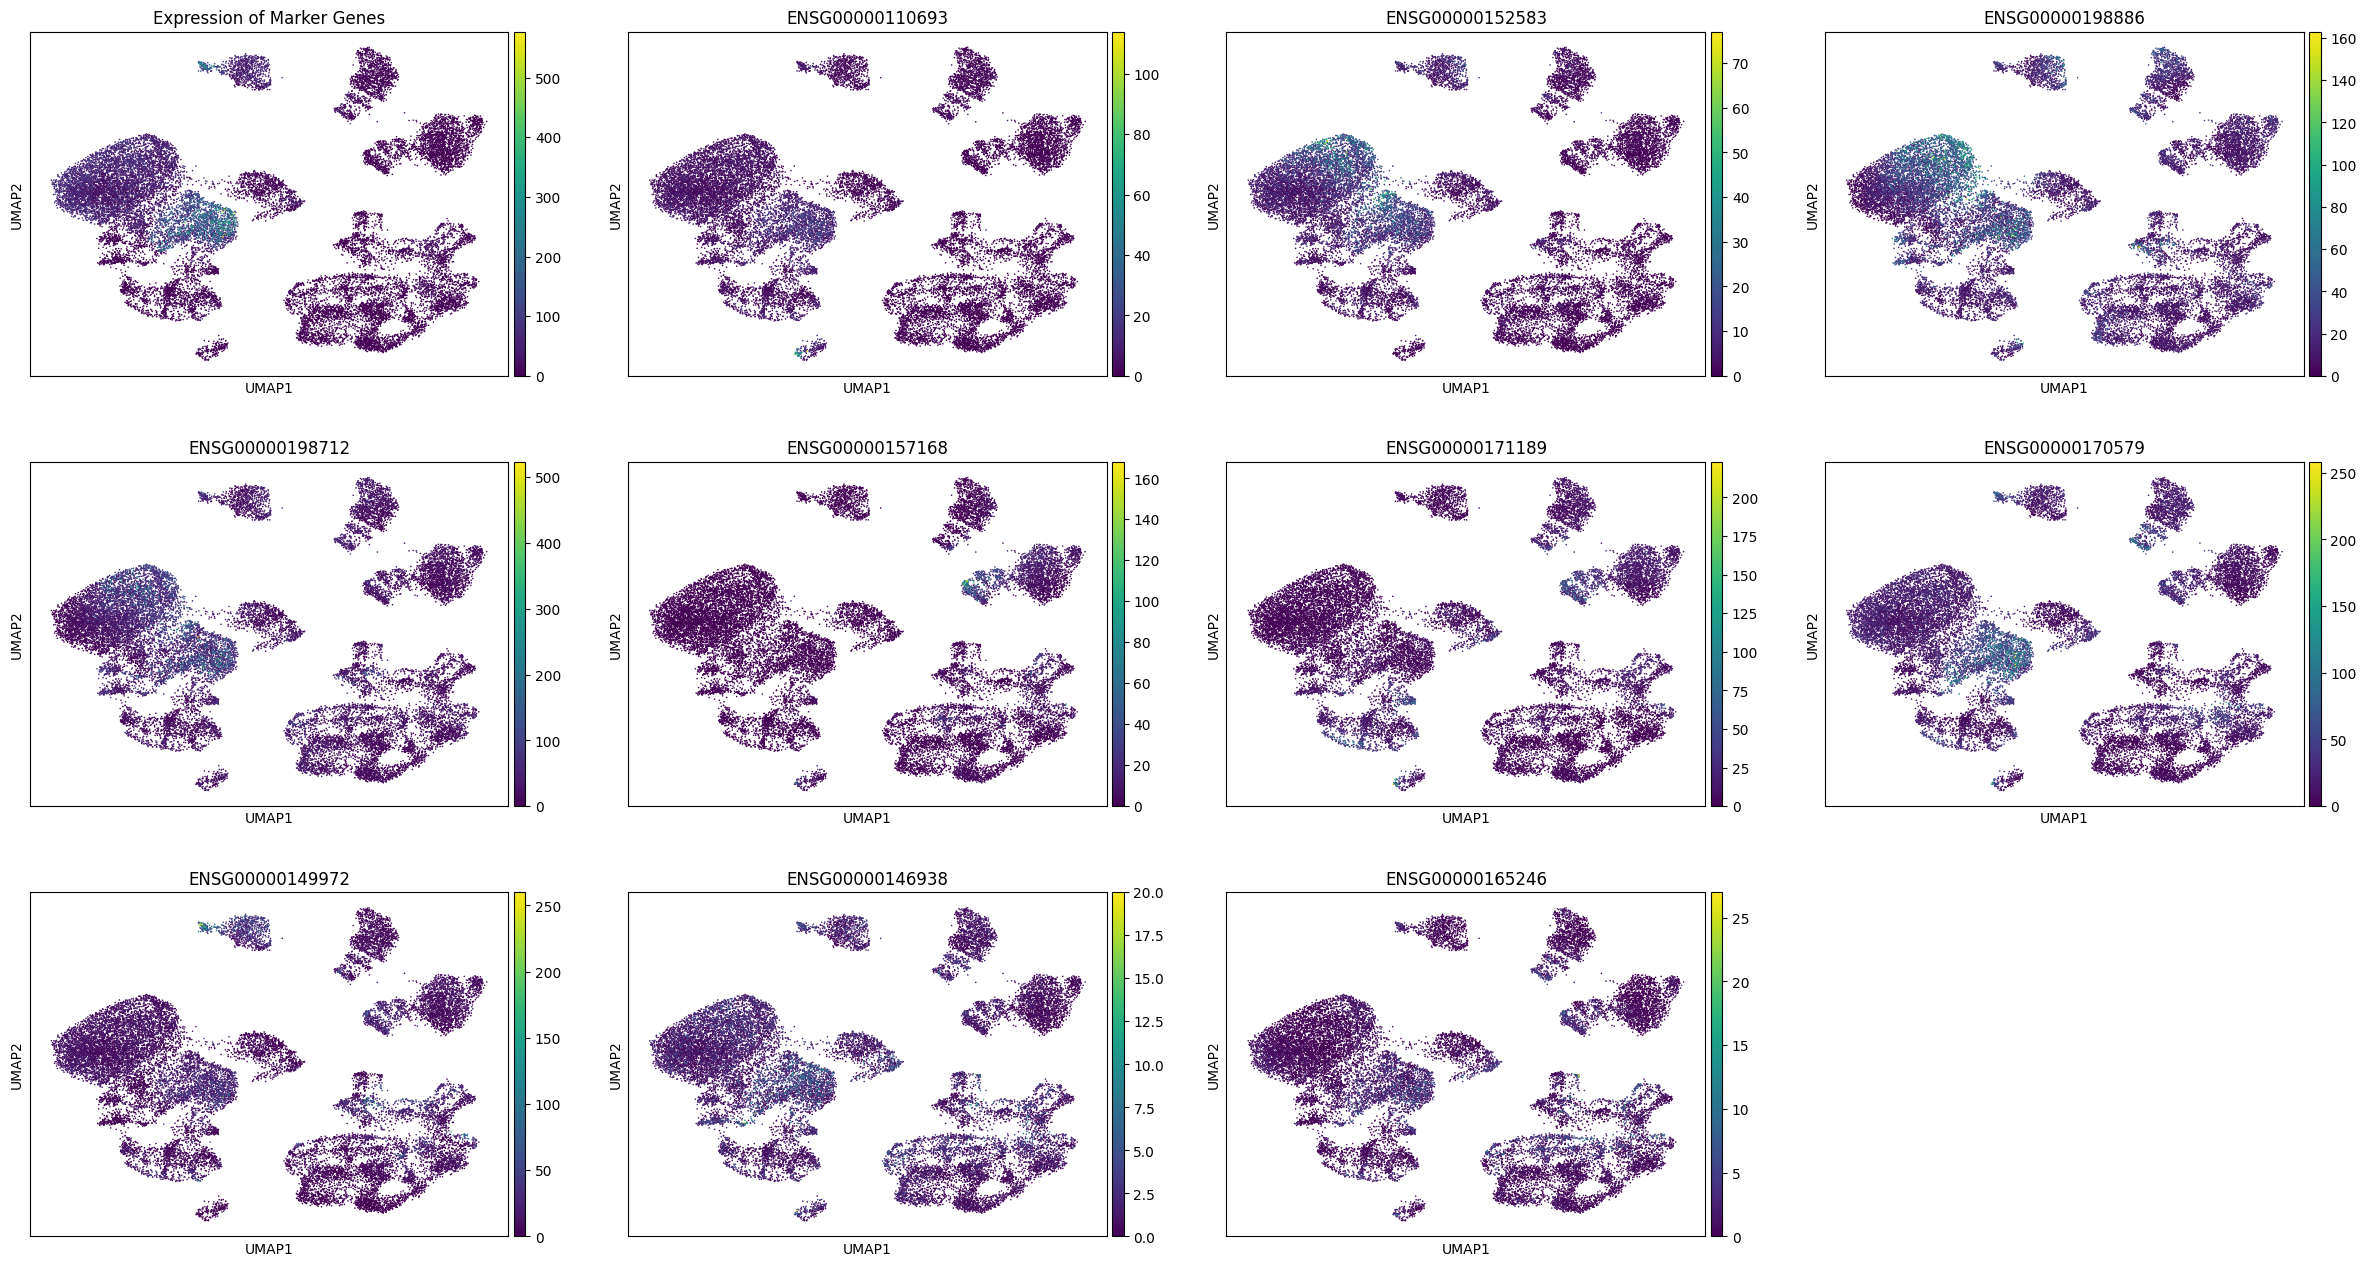

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

if existing_markers:
    print(f"Proceeding with analysis using {len(existing_markers)} found markers.")

    # Ensure we have the correct gene identifiers for existing markers
    marker_ids = [gene_aliases.get(m, m) for m in existing_markers]

    # Calculate marker scores
    marker_scores = pd.DataFrame(index=adata.obs['leiden'].unique(), columns=existing_markers)

    for cluster in adata.obs['leiden'].unique():
        cluster_cells = adata[adata.obs['leiden'] == cluster]
        for marker, marker_id in zip(existing_markers, marker_ids):
            marker_scores.loc[cluster, marker] = np.mean(cluster_cells[:, marker_id].X)

    # Convert marker_scores to numeric, replacing any non-numeric values with NaN
    marker_scores = marker_scores.apply(pd.to_numeric, errors='coerce')

    # Check if we have any valid data after conversion
    if marker_scores.notna().sum().sum() == 0:
        print("Error: No valid numeric data in marker scores. Unable to create heatmap.")
    else:
        # Remove any columns that are all NaN
        marker_scores = marker_scores.dropna(axis=1, how='all')

        # Normalize scores
        marker_scores = (marker_scores - marker_scores.min()) / (marker_scores.max() - marker_scores.min())


        # Plot heatmap of marker expression by cluster
        marker_scores.sort_index(inplace=True)
        plt.figure(figsize=(10, 8))
        sns.heatmap(marker_scores, annot=True, cmap='YlOrRd', fmt='.2f')
        plt.title('Marker Expression by Cluster')
        plt.show()

        # Identify potential clusters of interest
        cluster_score = marker_scores.mean(axis=1)
        potential_clusters = cluster_score[cluster_score > cluster_score.median()].index.tolist()


        #Limit Clusters
        potential_clusters = ['0', '1', '3', '6', '8', '12', '13', '16']
        print(f"Potential clusters of interest: {potential_clusters}")

        # Create a new column for potential cells of interest
        adata.obs['potential_cells_of_interest'] = adata.obs['leiden'].isin(potential_clusters)
        adata.obs['potential_cells_of_interest'] = adata.obs['potential_cells_of_interest'].astype('category')

        # Visualize potential cells of interest
        sc.pl.umap(adata, color='potential_cells_of_interest', title='UMAP: Potential Cells of Interest')
        plt.show()

        # Perform differential expression analysis
        sc.tl.rank_genes_groups(adata, 'potential_cells_of_interest', method='wilcoxon')
        sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False,gene_symbols="feature_name")
        plt.show()

        # Get top differentially expressed genes
        diff_genes = sc.get.rank_genes_groups_df(adata, group='True')
        top_genes = diff_genes.sort_values(by="scores",ascending=False).head(50)
        top_genes.names = top_genes.names.map(gene_alias)

        print("Top 50 genes enriched in potential cells of interest:")
        print(top_genes[['names', 'logfoldchanges', 'pvals_adj']])

        # Visualize expression of marker genes
        print("\nVisualizing expression of marker genes:")
        sc.pl.umap(adata, color=marker_ids, ncols=4, title='Expression of Marker Genes')
        plt.show()

else:
    print("No markers found. Cannot proceed with tangle-bearing neuron analysis.")
    print("Consider using different marker genes or a different approach to identify cell types of interest.")

In [13]:
cluster_score.rename('Score',inplace=True)

cluster_score.sort_values(ascending=False).head(10)


11    0.742065
0     0.717707
18    0.687868
1     0.683917
4     0.641874
2     0.607634
21    0.595316
5     0.538348
17    0.531537
3     0.505320
Name: Score, dtype: float64

In [14]:
# Identify potentially interesting clusters

potential_clusters = ['0', '1', '3', '6', '8', '12', '13', '16']



In [19]:
# Create a new column for potential tangle-bearing neurons
adata.obs['potential_clusters'] = adata.obs['leiden'].isin(potential_clusters)
# Convert to categorical
adata.obs['potential_clusters'] = adata.obs['potential_clusters'].astype('category')

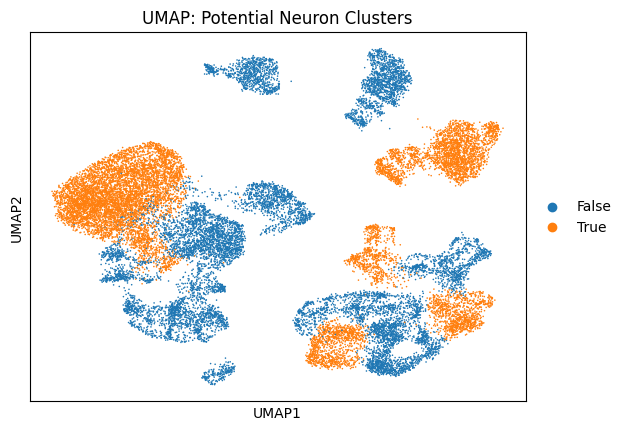

In [20]:
# Visualize potential tangle-bearing neurons
sc.pl.umap(adata, color='potential_clusters', title='UMAP: Potential Neuron Clusters')
plt.show()

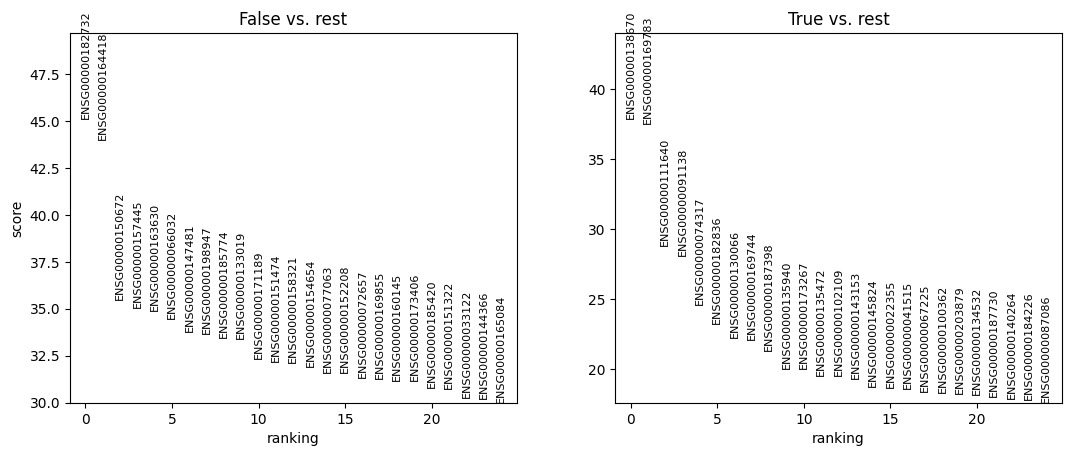

In [21]:
# Perform differential expression analysis
sc.tl.rank_genes_groups(adata, 'potential_clusters', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)
plt.show()

In [22]:
# Get top differentially expressed genes
diff_genes = sc.get.rank_genes_groups_df(adata, group='True')
top_genes = diff_genes.head(50)
top_genes.names = top_genes.names.map(gene_alias)
print("Top 50 genes enriched in potential neuron clusters:")
print(top_genes[['names', 'logfoldchanges', 'pvals_adj']])

Top 50 genes enriched in potential neuron clusters:
          names  logfoldchanges      pvals_adj
0      RASGEF1B        1.840746   0.000000e+00
1        LINGO1        1.822733  7.688392e-304
2         GAPDH        1.977390  3.538372e-179
3       SLC26A3        1.112762  4.841117e-171
4          SNCB        1.425074  6.496372e-131
5        PLCXD3        0.704901  9.686683e-117
6          SAT1        1.148247  2.553819e-107
7          LDB2        0.402124  8.292728e-106
8         LUZP2        1.347576   1.119818e-98
9         COX5B        1.563791   1.026882e-86
10         SNCG        2.026873   1.093097e-86
11        FAIM2        1.129316   8.079229e-83
12       PCSK1N        0.970391   1.514697e-82
13       ATP1B1        2.689126   8.450636e-81
14       CXCL14        1.512888   3.223667e-76
15       GABRA1        0.738082   1.626039e-75
16        MYO16        0.018127   1.007330e-74
17          PKM        1.128930   2.202769e-73
18        PVALB        2.535082   1.720405e-72
19      

<ipython-input-22-1601e337623b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_genes.names = top_genes.names.map(gene_alias)


In [23]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [24]:
diff_genes = sc.get.rank_genes_groups_df(adata, group='True')
top_genes = diff_genes.head(50)
top_genes.names = top_genes.names.map(gene_alias)
print("Top 50 genes enriched in potential neuron clusters:")
print(top_genes[['names', 'logfoldchanges', 'pvals_adj']])


Top 50 genes enriched in potential neuron clusters:
          names  logfoldchanges      pvals_adj
0      RASGEF1B        1.840746   0.000000e+00
1        LINGO1        1.822733  7.688392e-304
2         GAPDH        1.977390  3.538372e-179
3       SLC26A3        1.112762  4.841117e-171
4          SNCB        1.425074  6.496372e-131
5        PLCXD3        0.704901  9.686683e-117
6          SAT1        1.148247  2.553819e-107
7          LDB2        0.402124  8.292728e-106
8         LUZP2        1.347576   1.119818e-98
9         COX5B        1.563791   1.026882e-86
10         SNCG        2.026873   1.093097e-86
11        FAIM2        1.129316   8.079229e-83
12       PCSK1N        0.970391   1.514697e-82
13       ATP1B1        2.689126   8.450636e-81
14       CXCL14        1.512888   3.223667e-76
15       GABRA1        0.738082   1.626039e-75
16        MYO16        0.018127   1.007330e-74
17          PKM        1.128930   2.202769e-73
18        PVALB        2.535082   1.720405e-72
19      

<ipython-input-24-bbf5e50899f9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_genes.names = top_genes.names.map(gene_alias)



Fitting Logistic Regression Model...

Model Evaluation:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      3506
           1       0.97      0.94      0.96      3454

    accuracy                           0.96      6960
   macro avg       0.96      0.96      0.96      6960
weighted avg       0.96      0.96      0.96      6960


Confusion Matrix:
[[3422   84]
 [ 193 3261]]


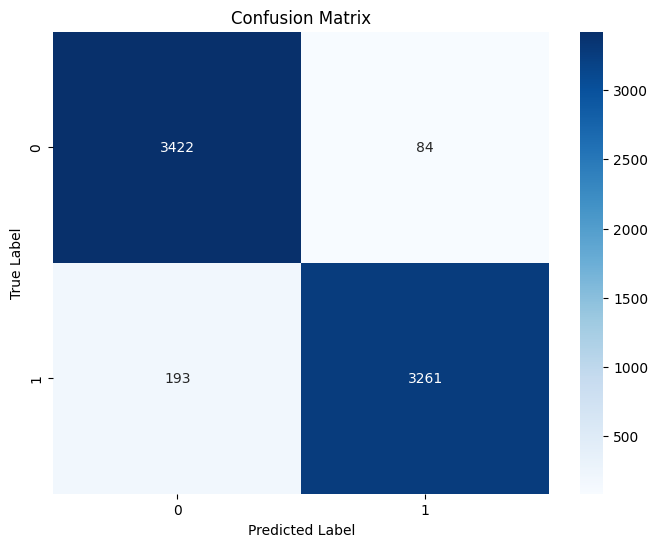


Top 20 Important Features:
                 feature  importance
25775             INO80D    0.441087
22717               XIST    0.422637
13070          KIF5C-AS1    0.336138
7980                GPS2    0.316724
24369             TTTY14    0.315441
9832              NLGN4Y    0.267802
8876               USP9Y    0.261842
14728  ENSG00000255422.4    0.246625
1898             ATP5F1D    0.226043
7134              PCSK1N    0.225705
19531                UTY    0.214606
16052           MPHOSPH8    0.211428
18938               BCOR    0.205799
382                H1-10    0.203398
15006             PDXDC1    0.201592
3075   ENSG00000278766.2    0.199627
17093              USP39    0.195823
5313              ARL17B    0.192425
19804             MALAT1    0.178789
6526                ESF1    0.176174


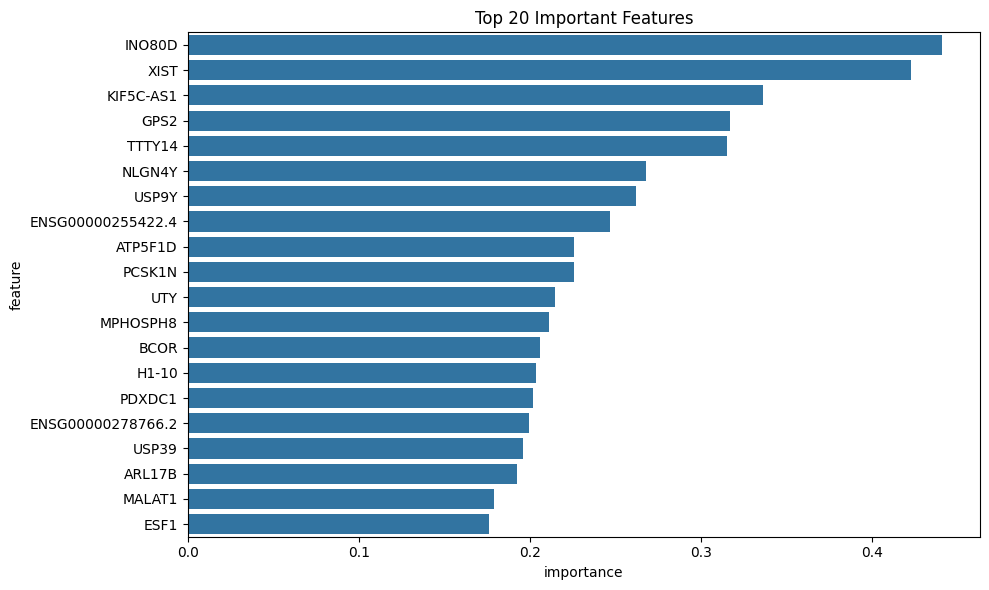

In [25]:
# Logistic Regression Model
print("\nFitting Logistic Regression Model...")

# Prepare the data
X = adata.X
y = adata.obs['disease'].cat.codes  # Convert categorical to numeric

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler(with_mean=False)  # with_mean=False for sparse data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = lr_model.predict(X_test_scaled)

# Evaluate the model
print("\nModel Evaluation:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': adata.var_names.map(gene_alias),
    'importance': abs(lr_model.coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Print top 20 important features
print("\nTop 20 Important Features:")
print(feature_importance.head(20))

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
plt.title('Top 20 Important Features')
plt.tight_layout()
plt.show()